# Q. 21 - 30

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

def BGR2RGB(_img):
    img = _img.copy()
    img[:,:,0], img[:,:,2] = img[:,:,2], img[:,:,0].copy()
    return img

def get_gray_image(img):    
    img = (0.2126*img[:,:,2] + 0.7152*img[:,:,1] + 0.0722*img[:,:,0]).astype(np.uint8)
    return np.asarray([img]).reshape(128,128,1)

def show_histgram(img):
    plt.figure()
    plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
    plt.show()

## Q.21. Histogram Normalization

### Detail：Implement histogram normalization.

It can be seen that the histogram has a bias. For example, if there are many pixels close to 0, the image will be dark overall, and if there are many pixels close to 255, the image will be bright. The local bias of the histogram is expressed as a **narrow dynamic range** . Therefore, processing such as normalization and flattening of the histogram is necessary to make the image easy to be viewed by the human eye.

This histogram normalization is called **gray-scale transformation,** and can be realized by the following equation when converting an image having pixel values of [c, d] into a range of [a, b]. This time, *imori_dark.jpg* is converted to the range of [0, 255] respectively.

```bash
xout = { 
          a                         (xin < c)
         (b-a)/(d-c) * (xin-c) + a  (c <= xin <= d)
          b                         (d < xin)
        }
```

|Input (imori_dark.jpg)|Output (answer_21_1.jpg) |Histogram (answer_21_2.png)|
|:---:|:---:|:---:|
|![](images/imori_dark.jpg)|![](images/answer_21_1.jpg)|![](images/answer_21_2.png)|

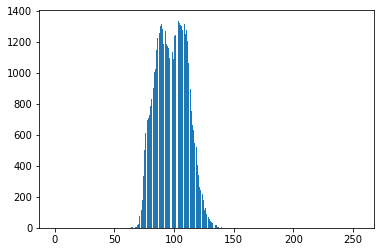

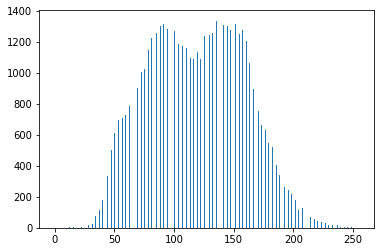

In [2]:
#21
img = cv2.imread("images/imori_dark.jpg")

def hist_normalization(img, a=0, b=255):
    c = img.min()
    d = img.max()
    
    out = (b-a) / (d - c) * (img - c) + a
    out = np.clip(out,a,b)
    return out.astype(np.uint8)

normed_img = hist_normalization(img,a=0, b=255)
show_histgram(img)
show_histgram(normed_img)

## Q.22. Histogram Operation

Operate the mean value of the histogram so that $m_0$ = 128 and the standard deviation $s_0$ = 52.

This is not a change in the dynamic range of the histogram but an operation to change the histogram to be flat. To achieve this, the conversion is performed according to the following equation.

```bash
xout = s0/s * (xin - m) + m0
```

|Input (imori_dark.jpg)|Output (answer_22_1.jpg) |Histogram (answer_22_2.png)|
|:---:|:---:|:---:|
|![](images/imori_dark.jpg)|![](images/answer_22_1.jpg)|![](images/answer_22_2.png)|

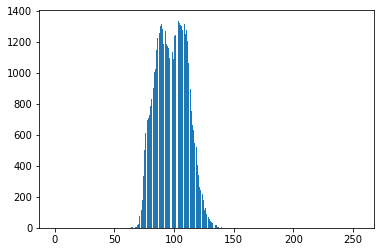

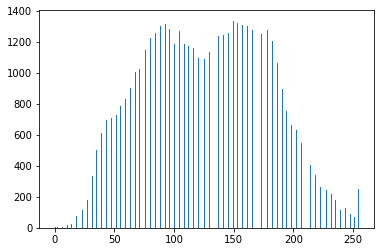

In [3]:
#22
img = cv2.imread("images/imori_dark.jpg")

def hist_standardization(img, m0=128, s0=52):
    m = np.mean(img)
    s = np.std(img)
    
    out = s0/s*(img-m) + m0
    out = np.clip(out,0,255)
    return out.astype(np.uint8)

std_img = hist_standardization(img, m0=128, s0=52)
show_histgram(img)
show_histgram(std_img)

## Q.23. Histogram Equalization

### Detail: Implement histogram flattening.

Histogram flattening is an operation for changing the histogram to be flat, and is an operation for balancing the histogram values without requiring the above-mentioned average value or standard deviation.

This is defined by the following equation. 

- S: total number of pixel values
- Zmax: maximum value of pixel values
- h (z): frequency of density z

```bash
Z' = Zmax / S * Sum{i=0:z} h(z)
```

|Input (imori.jpg)|Output (answer_23_1.jpg) |Histogram (answer_23_2.png)|
|:---:|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_23_1.jpg)|![](images/answer_23_2.png)|

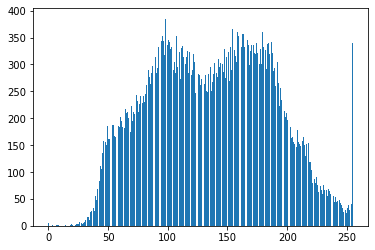

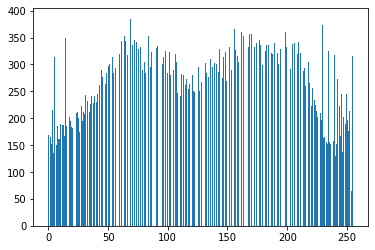

In [4]:
#23
img = cv2.imread("images/imori.jpg")

def hist_equalization(img, zmax=255.):
    H,W,C = img.shape
    S = H*W*C
    out = img.copy().astype(np.float)
    sum_h = 0.
    for i in range(1, 255):
        idx = np.where(img == i)
        sum_h += len(img[idx])
        out[idx] = zmax/S * sum_h
    return out.astype(np.uint8)

equal_img = hist_equalization(img)
show_histgram(img)
show_histgram(equal_img)

## Q.24. Gamma Correction

### Detail: *Perform* gamma correction (c = 1, g = 2.2) on *imori_gamma.jpg* .

Gamma correction is correction when pixel values are converted non-linearly via a device such as a camera. When an image is displayed as it is on a display or the like, the screen becomes dark. **Therefore, it is an object of gamma correction to perform image display excluding the characteristics of the display by increasing the values of RGB in advance.**

The non-linear transformation is shown in the following equation. 

- x: is normalized to [0, 1]. 
- c: constant
- g: gamma characteristic (usually 2.2)

```bash
x' = c * Iin ^ g
```

Therefore, gamma correction is performed by the following equation.

```bash
Iout = (1/c * Iin) ^ (1/g)
```

![](images/question_24_1.jpg) ![](images/question_24_2.jpg)

|Input (imori_gamma.jpg)|Output (answer_24.jpg)|
|:---:|:---:|
|![](images/imori_gamma.jpg)|![](images/answer_24.jpg)|

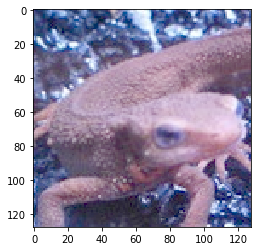

In [5]:
#24 
img = cv2.imread("images/imori_gamma.jpg")

def gamma_correction(img, c=1, g=2.2):
    img = np.asarray(img) / 255.
    img = np.float_power((img/c), 1/g)
    img *= 255
    return np.clip(img,0,255).astype(np.uint8)

img2 = gamma_correction(img)
plt.imshow(BGR2RGB(img2))

## Q.25. Nearest Neighbor Interpolation

### Detail: Enlarge the image 1.5 times by nearest neighbor interpolation.

Nearest neighbor interpolation is a method of using the nearest pixel as it is when enlarging an image. Simple and fast processing speed, but the image quality is significantly degraded.

Interpolated by the following equation. 

- I ': the image after enlargement,
- I: the image before enlargement
- a: the magnification
- []: rounding off

```bash
I'(x,y) = I([x/a], [y/a])
```
|Input (imori.jpg)|Output (answer_25.jpg)|
|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_25.jpg)|

(192, 192, 3)


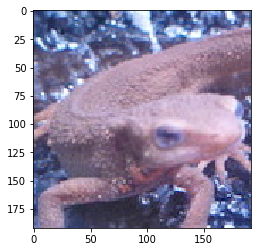

In [6]:
#25.1
img = cv2.imread("images/imori.jpg")

def nn_interpolation(img, a=1.5):
    H,W,C = img.shape
    H2 = int(H*a)
    W2 = int(W*a)
    
    x = np.tile(np.arange(W2), (H2, 1))
    y = np.tile(np.arange(H2), (W2, 1)).T
    x = np.round(x/a).astype(np.uint8)
    y = np.round(y/a).astype(np.uint8)
    return img[y,x].astype(np.uint8)

img2 = nn_interpolation(img)
print(img2.shape)
plt.imshow(BGR2RGB(img2))

(1, 192) (192, 1)
(192, 192, 3)


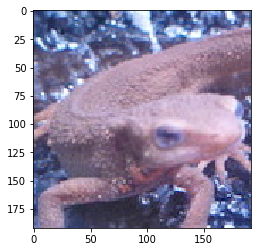

In [7]:
#25.2
img = cv2.imread("images/imori.jpg")

def nn_interpolation(img, a=1.5):
    H,W,C = img.shape
    H2 = int(H*a)
    W2 = int(W*a)
    
    x = np.arange(W2).reshape(1,-1)
    y = np.arange(H2).reshape(-1,1)
    print(x.shape, y.shape)
    x = np.round(x/a).astype(np.uint8)
    y = np.round(y/a).astype(np.uint8)
    return img[y,x].astype(np.uint8)

img2 = nn_interpolation(img)
print(img2.shape)
plt.imshow(BGR2RGB(img2))

## Q.26. Bi-linear Interpolation

### Detail：Enlarge the image 1.5 times with Bi-linear interpolation.

Bi-linear interpolation is a method of complementing by weighting the four surrounding pixels according to the distance. Although the processing time is increased as the amount of calculation is large, deterioration of the image quality can be suppressed.

1. The coordinates (x’, y’ ) of the magnified image are divided by the magnification ratio a to obtain floor (x '/ a, y' / a).
2. Four pixels around (x '/ a, y' / a) of the original image, I (x, y), I (x + 1, y), I (x, y + 1), I (x + 1, y + 1)

```bash
I(x,y)    I(x+1,y) 
     * (x'/a,y'/a)
I(x,y+1)  I(x+1,y+1)
```

3. The distance d between each pixel and (x '/ a, y' / a) is determined and weighted. w = d / Sum d
4. The pixel (x ′, y ′) of the enlarged image is determined by the following equation. dx = x '/ a-x, dy = y' / a-y
```bash
I'(x',y') = (1-dx)(1-dy)I(x,y) + dx(1-dy)I(x+1,y) + (1-dx)dyI(x,y+1) + dxdyI(x+1,y+1)
```

|Input (imori.jpg)|Output (answer_26.jpg)|
|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_26.jpg)|

(192, 192, 3)


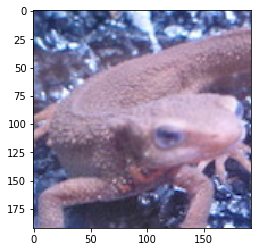

In [27]:
#26
img = cv2.imread("images/imori.jpg")

def biliner_interpolation(img, a=1.5):
    H,W,C = img.shape
    H2 = int(H*a)
    W2 = int(W*a)
    
    x = np.tile(np.arange(W2), (H2, 1))/a
    y = np.tile(np.arange(H2), (W2, 1)).T/a
    x2 = np.floor(x).astype(np.uint8)
    y2 = np.floor(y).astype(np.uint8)
    
    x2 = np.clip(x2, 0, W-2)
    y2 = np.clip(y2, 0, H-2)

    dx = x - x2
    dy = y - y2

    dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
    dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)

    out = (1-dx) * (1-dy) * img[y2, x2] + dx * (1 - dy) * img[y2, x2+1] + (1 - dx) * dy * img[y2+1, x2] + dx * dy * img[y2+1, x2+1]

    return np.clip(out, 0, 255).astype(np.uint8)    

img2 = biliner_interpolation(img)
print(img2.shape)
plt.imshow(BGR2RGB(img2))

## Q.27. Bi-cubic Interpolation

### Detail: Enlarge the image 1.5 times by Bi-cubic interpolation.

Bi-cubic interpolation is an extension of Bi-linear interpolation, and performs interpolation from surrounding 16 pixels.

```bash
I(x-1,y-1)  I(x,y-1)  I(x+1,y-1)  I(x+2,y-1)
I(x-1,y)    I(x,y)    I(x+1,y)    I(x+2,y)
I(x-1,y+1)  I(x,y+1)  I(x+1,y+1)  I(x+2,y+1)
I(x-1,y+2)  I(x,y+2)  I(x+1,y+2)  I(x+2,y+2)
```

The distance to each pixel is determined as in the following equation.

```bash
dx1 = x'/a - (x-1) , dx2 = x'/a - x , dx3 = (x+1) - x'/a , dx4 = (x+2) - x'/a
dy1 = y'/a - (y-1) , dy2 = y'/a - y , dy3 = (y+1) - y'/a , dy4 = (y+2) - y'/a
```

The weight is determined by the distance according to the following function: a is often -1.

```bash
h(t) = { (a+2)|t|^3 - (a+3)|t|^2 + 1    (when |t|<=1)
         a|t|^3 - 5a|t|^2 + 8a|t| - 4a  (when 1<|t|<=2)
         0                              (when 2<|t|) 
```

Using these pixels and weights, the pixels of the enlarged image are calculated by the following equation. The sum of each pixel multiplied by the weight is divided by the sum of the weights.

```bash
I'(x', y') = (Sum{i=-1:2}{j=-1:2} I(x+i,y+j) * wxi * wyj) / Sum{i=-1:2}{j=-1:2} wxi * wyj
```

|Input (imori.jpg)|Output (answer_27.jpg)|
|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_27.jpg)|


(192, 192, 3)


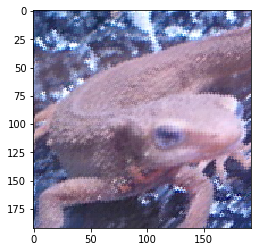

In [16]:
#27
img = cv2.imread("images/imori.jpg")

def bicubic_interpolation(img, a=1.5):
    H,W,C = img.shape
    H2 = int(H*a)
    W2 = int(W*a)
    
    x = np.tile(np.arange(W2), (H2, 1))/a
    y = np.tile(np.arange(H2), (W2, 1)).T/a
    x2 = np.floor(x).astype(np.uint8)
    y2 = np.floor(y).astype(np.uint8)
    
    x2 = np.minimum(x2, W-3)
    y2 = np.minimum(y2, H-3)

    dx1 = x - (x2-1) 
    dx2 = x - x2
    dx3 = (x2+1) - x 
    dx4 = (x2+2) - x
    dy1 = y - (y2-1) 
    dy2 = y - y2
    dy3 = (y2+1) - y
    dy4 = (y2+2) - y
    
    dxs = {1:dx1, 2:dx2, 3:dx3, 4:dx4}
    dys = {1:dy1, 2:dy2, 3:dy3, 4:dy4}
    
    def _weight_dist(t,a=-1):
        out = np.zeros_like(t)
        idx = np.where(t<=1)
        out[idx] = ((a+2)*abs(t)**3 - (a+3)*abs(t)**2 + 1)[idx]
        idx = np.where((t>1) & (t<=2))
        out[idx] = (a*abs(t)**3 - 5*a*abs(t)**2 + 8*a*abs(t) - 4*a)[idx]
        return out

    w_sum = np.zeros((H2, W2, C))
    out = np.zeros((H2, W2, C))

    for j in range(1,5):
        for i in range(1, 5):
            wx = _weight_dist(dxs[i])
            wy = _weight_dist(dys[j])
            wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
            wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)
            
            w_sum += wx * wy
            out += wx * wy * img[np.clip(y2+i-2,0,W-1), np.clip(x2+j-2,0,W-1)]

    out /= w_sum

    return np.clip(out, 0, 255).astype(np.uint8)    

img2 = bicubic_interpolation(img)
print(img2.shape)
plt.imshow(BGR2RGB(img2))

## Q.28.  Affine Transformation (Translation)

Translate the image by +30 in the x direction and -30 in the y direction using affine transformation.

Affine transformation is an operation that transforms an image using a 3 × 3 matrix.

The conversion is (1) translation (Q. 28) (2) scaling (Q. 29) (3) rotation (Q. 30) (4) skew (Q. 31).

The original image is (x, y), and the converted image is (x ', y'). The scaling of the image is expressed by the following equation.

```bash
[ x' ] = [a b][x]
  y'      c d  y
```

On the other hand, parallel movement is expressed by the following equation.

```bash
[ x' ] = [x] + [tx]
  y'      y  +  ty
```

Summarizing the above into one equation, we obtain the following equation, which is an affine transformation.

```bash
  x'       a b tx    x
[ y' ] = [ c d ty ][ y ]
  1        0 0  1    1
```

The following equation is used for parallel movement.

```bash
  x'       1 0 tx    x
[ y' ] = [ 0 1 ty ][ y ]
  1        0 0  1    1
```

|Input (imori.jpg)|Output (answer_28.jpg)|
|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_28.jpg)|

(128, 128, 3)


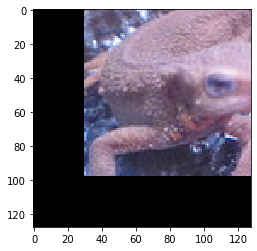

In [19]:
#28
img = cv2.imread("images/imori.jpg")

def affine(_img, mat):
    assert mat.shape == (3,3)
    assert mat[2,0] == mat[2,1] == 0
    a,b,c,d,tx,ty = mat[0,0],mat[0,1],mat[1,0],mat[1,1],mat[0,2],mat[1,2]
    H, W, C = _img.shape

    img = np.zeros((H+2, W+2, C))
    img[1:H+1, 1:W+1] = _img

    H_new = np.round(H * d).astype(np.uint8)
    W_new = np.round(W * a).astype(np.uint8)
    out = np.zeros((H_new+1, W_new+1, C))

    x_new = np.tile(np.arange(W_new), (H_new, 1)).astype(np.uint8)  
    y_new = np.tile(np.arange(H_new), (W_new, 1)).T.astype(np.uint8)  

    adbc = a * d - b * c
    x = np.round((d * x_new  - b * y_new) / adbc) - tx + 1
    y = np.round((-c * x_new + a * y_new) / adbc) - ty + 1

    x = np.clip(x, 0, W+1).astype(np.uint8)  
    y = np.clip(y, 0, H+1).astype(np.uint8)  

    out[y_new, x_new] = img[y,x]

    out = out[:H_new, :W_new]

    return np.clip(out, 0, 255).astype(np.uint8)    

tx = 30
ty = -30
mat = np.array([[1,0,tx], 
                [0,1,ty],
                [0,0, 1]])
img2 = affine(img,mat)
print(img2.shape)
plt.imshow(BGR2RGB(img2))

## Q.29. Affine Transformation (Scaling)

(1) Resize 1.3 times in x direction 

(2) 0.8 times in y direction using affine transformation.

Also, in addition to the conditions of (2) and (1), simultaneously realize parallel movement of +30 in the x direction and -30 in the y direction.

|Input (imori.jpg)|Output (1) (answer_29_1.jpg)|Output (2) (answer_29_2.jpg)|
|:---:|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_29_1.jpg)|![](images/answer_29_2.jpg)|

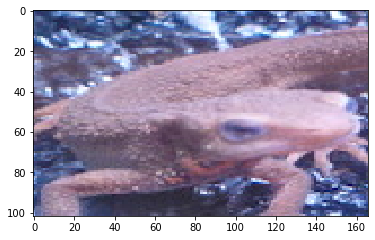

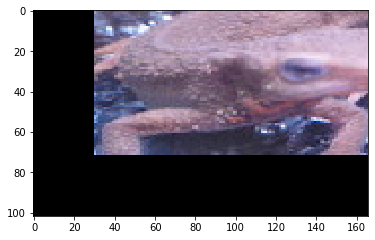

In [11]:
#29
img = cv2.imread("images/imori.jpg")   

a = 1.3
d = 0.8
mat = np.array([[a,0,0],
                [0,d,0],
                [0,0, 1]])
tx = 30
ty = -30
mat2 = np.array([[1,0,tx], 
                [0,1,ty],
                [0,0, 1]])
img2 = affine(img,mat)
plt.figure()
plt.imshow(BGR2RGB(img2))
img3 = affine(img2,mat2)
plt.figure()
plt.imshow(BGR2RGB(img3))

## Q.30. Affine Transformation (Rotation)

(1) Rotate 30 degrees counterclockwise using affine transformation.

(2) Use the affine transformation to create an image that can be seen in the entire image rotated counterclockwise by 30 degrees. (However, if a simple affine transformation is performed, the image will be cut off, so some ingenuity is required.)

In the affine transformation, when rotating counterclockwise by A degrees, the following equation is obtained.

```bash
  x'       cosA -sinA tx    x
[ y' ] = [ sinA  cosA ty ][ y ]
  1         0     0    1    1
```

|Input (imori.jpg)|Output (1) (answer_30_1.jpg)|Output (2) (answer_30_2.jpg)|
|:---:|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_30_1.jpg)|![](images/answer_30_2.jpg)|

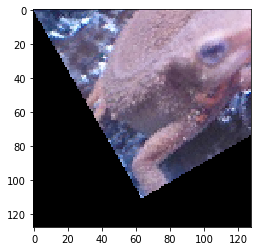

In [38]:
#30 (1)
img = cv2.imread("images/imori.jpg")   

def affine2(_img, mat):
    assert mat.shape == (3,3)
    assert mat[2,0] == mat[2,1] == 0
    a,b,c,d,tx,ty = mat[0,0],mat[0,1],mat[1,0],mat[1,1],mat[0,2],mat[1,2]
    H, W, C = _img.shape

    img = np.zeros((H+2, W+2, C))
    img[1:H+1, 1:W+1] = _img

    H_new = np.round(H).astype(np.uint8)
    W_new = np.round(W).astype(np.uint8)
    out = np.zeros((H_new+1, W_new+1, C))

    x_new = np.tile(np.arange(W_new), (H_new, 1)).astype(np.uint8)  
    y_new = np.tile(np.arange(H_new), (W_new, 1)).T.astype(np.uint8)  

    adbc = a * d - b * c
    x = np.round((d * x_new  - b * y_new) / adbc) - tx + 1
    y = np.round((-c * x_new + a * y_new) / adbc) - ty + 1

    x = np.clip(x, 0, W+1).astype(np.uint8)  
    y = np.clip(y, 0, H+1).astype(np.uint8)  

    out[y_new, x_new] = img[y,x]

    out = out[:H_new, :W_new]

    return np.clip(out, 0, 255).astype(np.uint8) 

theta = - 30/360 * 2 * np.pi
mat = np.array([[np.cos(theta),-np.sin(theta),0], 
                [np.sin(theta),np.cos(theta),0],
                [0,0, 1]])

img2 = affine2(img,mat)
plt.figure()
plt.imshow(BGR2RGB(img2))

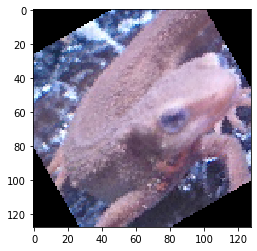

In [13]:
#30 (2)
img = cv2.imread("images/imori.jpg")   

def affine3(_img, mat):
    assert mat.shape == (3,3)
    assert mat[2,0] == mat[2,1] == 0
    a,b,c,d,tx,ty = mat[0,0],mat[0,1],mat[1,0],mat[1,1],mat[0,2],mat[1,2]
    H, W, C = _img.shape

    img = np.zeros((H+2, W+2, C))
    img[1:H+1, 1:W+1] = _img

    H_new = np.round(H).astype(np.uint8)
    W_new = np.round(W).astype(np.uint8)
    out = np.zeros((H_new+1, W_new+1, C))

    x_new = np.tile(np.arange(W_new), (H_new, 1)).astype(np.uint8)  
    y_new = np.tile(np.arange(H_new), (W_new, 1)).T.astype(np.uint8)  

    adbc = a * d - b * c
    x = np.round((d * x_new  - b * y_new) / adbc) - tx + 1
    y = np.round((-c * x_new + a * y_new) / adbc) - ty + 1
    
    dcx = (np.max(x)+np.min(x))//2 - W//2
    dcy = (np.max(y)+np.min(y))//2 - H//2

    x = np.clip(x-dcx, 0, W+1).astype(np.uint8)  
    y = np.clip(y-dcy, 0, H+1).astype(np.uint8)  

    out[y_new, x_new] = img[y,x]

    out = out[:H_new, :W_new]

    return np.clip(out, 0, 255).astype(np.uint8)

theta = - 30/180*np.pi
mat = np.array([[np.cos(theta),-np.sin(theta),0], 
                [np.sin(theta),np.cos(theta),0],
                [0,0, 1]])

img2 = affine3(img,mat)
plt.figure()
plt.imshow(BGR2RGB(img2))